In [ ]:
#load the pos/neg/fp from pipeline tests into their own list of arrays 
import os
from astropy.convolution import convolve, Gaussian2DKernel
from astropy.nddata.utils import Cutout2D
from astropy.io import fits
import numpy as np
from sklearn.preprocessing import minmax_scale



NEG_PATH = "/home/toyonaga/scratch/HSTLens_datasets/batchjob_2_train_n/"
POS_PATH = "/home/toyonaga/scratch/HSTLens_datasets/batchjob_2_train_p/"
 #includes both pos and neg samples



#load the negatives into even numbered indices (including 0)
count =0
set_size =30000
nx=np.ones((set_size, 1, 100, 100))
ny=np.ones((set_size,1))
bad_images = []
for filename in os.listdir(NEG_PATH):
    if filename.endswith(".fits") and count<set_size: 
        pic = fits.open(NEG_PATH+filename)[0].data

        if np.isnan(pic).all() ==True:
            bad_images.append(count)
            continue
            
        nx[count] = np.nan_to_num(pic)
        ny[count] =(np.array([0]))
        print("1 "+str(count))
        count+=1

nx = np.delete(nx,bad_images, axis=0)        
ny = np.delete(ny,bad_images, axis=0) 
print(nx.shape)
    
    
#load the positives into odd numered indices
set_size =30000
px=np.ones((set_size, 1, 100, 100))
py=np.ones((set_size,1))
count =0
bad_images = []
for filename in os.listdir(POS_PATH):
    if filename.endswith(".fits") and count<set_size: 
        pic = fits.open(POS_PATH+filename)[0].data
        
        if np.isnan(pic).all() ==True:
            bad_images.append(count)
            continue
            
        px[count]=np.nan_to_num(pic)
        py[count]=np.array([1])
        print("2 "+str(count))
        count+=1

px = np.delete(px,bad_images, axis=0)        
py = np.delete(py,bad_images, axis=0) 
print(px.shape)



1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
1 100
1 101
1 102
1 103
1 104
1 105
1 106
1 107
1 108
1 109
1 110
1 111
1 112
1 113
1 114
1 115
1 116
1 117
1 118
1 119
1 120
1 121
1 122
1 123
1 124
1 125
1 126
1 127
1 128
1 129
1 130
1 131
1 132
1 133
1 134
1 135
1 136
1 137
1 138
1 139
1 140
1 141
1 142
1 143
1 144
1 145
1 146
1 147
1 148
1 149
1 150
1 151
1 152
1 153
1 154
1 155
1 156
1 157
1 158
1 159
1 160
1 161
1 162
1 163
1 164
1 165
1 166
1 167
1 168
1 169
1 170
1 171
1 172
1 173
1 174
1 175
1 176
1 177
1 178
1 179
1 180
1 181
1 182
1 183
1 184


In [1]:
import numpy as np
pos = np.load('/home/toyonaga/scratch/HSTLens_datasets/batchjob_2_train_p_bin.npy')
neg = np.load('/home/toyonaga/scratch/HSTLens_datasets/batchjob_2_train_n_bin.npy')

In [19]:
import numpy as np
pos_test = np.load('/home/toyonaga/scratch/HSTLens_datasets/batchjob_2_test_p_bin.npy')
neg_test = np.load('/home/toyonaga/scratch/HSTLens_datasets/batchjob_2_test_n_bin.npy')

In [6]:
py =np.ones((pos.shape[0],1))
ny =np.zeros((neg.shape[0],1))


In [20]:
py_test =np.ones((pos_test.shape[0],1))
ny_test =np.zeros((neg_test.shape[0],1))

In [21]:
x_combined_test = np.concatenate((pos_test, neg_test))
y_combined_test = np.concatenate((py_test, ny_test)) 

In [7]:
bad_images=[]
for i in range(len(pos)):
    pos[i][0] = np.nan_to_num(pos[i][0])
    #print(i)
    if pos[i][0].all==0:
        bad_images.append(i)
print('done parsing')
pos = np.delete(pos,bad_images, axis=0)
py = np.ones((pos.shape[0],1))

bad_images=[]
for i in range(len(neg)):
    neg[i][0] = np.nan_to_num(neg[i][0])
    #print(i)
    if neg[i][0].all==0:
        bad_images.append(i)
print('done parsing')
neg = np.delete(neg,bad_images, axis=0)
ny = np.zeros((neg.shape[0],1))

done parsing
done parsing


In [3]:
#import from .npy bin file

import numpy as np
px = np.load("/home/toyonaga/scratch/positive_array.npy")
bad_images=[]
for i in range(len(px)):
    px[i][0] = np.nan_to_num(px[i][0])
    #print(i)
    if px[i][0].all==0:
        bad_images.append(i)
print('done parsing')
px = np.delete(px,bad_images, axis=0)
py = np.ones((px.shape[0],1))

nx = np.load("/home/toyonaga/scratch/negative_array.npy")
bad_images=[]
for i in range(len(nx)):
    nx[i][0] = np.nan_to_num(nx[i][0])
    #print(i)
    if nx[i][0].all==0:
        bad_images.append(i)
print('done parsing')
nx = np.delete(nx,bad_images, axis=0)
ny = np.zeros((nx.shape[0],1))


done parsing
done parsing


[1.]


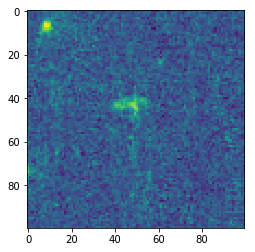

KeyboardInterrupt: 

In [8]:
 #quickly view some images
import matplotlib.pyplot as plt


from IPython import display

import os

print(len(x_combined_shuf))
sp=int(input("start position"))
for i in range(len(x_combined_shuf)):
    exit=False
    display.clear_output(wait=True)
    plt.imshow(x_combined_shuf[i+sp][0]) 
    print(y_combined_shuf[i+sp])
    plt.pause(0.01)
    while(1):
        
        ans = input("curr num "+str(i+sp)+"next=1, exit=0")
        plt.show()
        break
        if ans ==1:
            break
        if ans==0:
            exit=True
            break
    if exit==True:
        break

In [8]:
#randomize and shuffle and combine neg and pos
import random
#first combine the X and Y arrays. Split down the middle into pos and neg  
x_combined =np.concatenate((pos, neg))
y_combined =np.concatenate((py, ny)) 

#shuffle the combined arrays
s1 = np.arange(x_combined.shape[0])
np.random.shuffle(s1)
x_combined_shuf = x_combined[s1]
y_combined_shuf = y_combined[s1]



In [4]:
#randomize and shuffle and combine neg and pos
import random

x_combined = np.concatenate((px,nx ))
y_combined = np.concatenate((py,ny))

print('concat')

#shuffle the combined array
s3 = np.arange(x_combined.shape[0])
np.random.shuffle(s3)

x_combined_shuf =x_combined[s3]
y_combined_shuf = y_combined[s3]

# tr_x = x_combined_shuf[:len(x_combined_shuf)*0.8]
# tr_y = y_combined_shuf[:len(y_combined_shuf)*0.8]
# test_x = x_combined_shuf[len(x_combined_shuf)*0.8:]
# test_y = y_combined_shuf[len(y_combined_shuf)*0.8:]

concat


In [18]:
import tensorflow
import keras
from HSTLens_resnet18 import deeplens_classifier

my_model = deeplens_classifier(n_epochs=20, batch_size=128)
my_model._build() 

my_model._fit(x_combined_shuf,y_combined_shuf)

#my_model.model.save("real_lenses_weights") # issue with json serializing
my_model.model.save_weights("combined_nonsubtracted_weights_resnet17_h2_60000")
# my_model.model.load_weights("weights/combined_nonsubtracted_weights_resnet17_h2_60000")


building resnet16_s
(?, 1, 100, 100)
 resnet18
pre- resnet block entered!
resnet16_s blocks
kernel= 5
shorcut (?, 32, 50, 50) net (?, 32, 50, 50)
pre- resnet block entered!
resnet16_s blocks
kernel= 3
shorcut (?, 32, 25, 25) net (?, 32, 25, 25)
pre- resnet block entered!
resnet16_s blocks
kernel= 3
shorcut (?, 64, 12, 12) net (?, 64, 12, 12)
pre- resnet block entered!
resnet16_s blocks
kernel= 3
shorcut (?, 64, 6, 6) net (?, 64, 6, 6)
pre- resnet block entered!
resnet16_s blocks
kernel= 3
shorcut (?, 128, 3, 3) net (?, 128, 3, 3)
...Fitting model ...
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
step decay entered. Learning rate: 0.001
48000/48000 [==============================] - 69s 1ms/step - loss: 0.4400 - acc: 0.7911 - val_loss: 0.4176 - val_acc: 0.8312
Epoch 2/20
step decay entered. Learning rate: 0.001
48000/48000 [==============================] - 59s 1ms/step - loss: 0.2549 - acc: 0.8966 - val_loss: 0.5256 - val_acc: 0.7835
Epoch 3/20
step decay entered. Learni

In [7]:
(my_model.batch_history.epoch_losses) 

[0.745, 0.76, 0.75, 0.82, 0.86, 0.855, 0.825, 0.875, 0.875, 0.9]

auc 0.9877


/project/6016730/mlhaa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


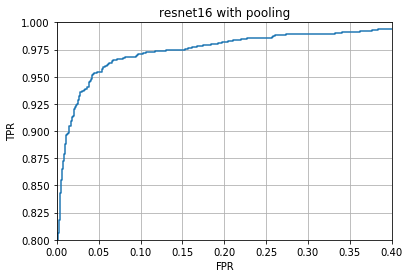

In [23]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# x_combined_roc = np.concatenate((ims_shuf[10000:], ims_real_test))
# y_combined_roc = np.concatenate((y_shuf[10000:], y_real_test))
fpr, tpr, t=my_model.eval_ROC(x_combined_test,y_combined_test)
print("auc "+str( metrics.auc(fpr, tpr)))

plt.title('resnet16 with pooling')
plt.plot(fpr,tpr)
plt.xlabel('FPR'); 
plt.ylabel('TPR')
plt.xlim(0,0.4); 
plt.ylim(0.8,1)
plt.grid('on')

/project/6016730/mlhaa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


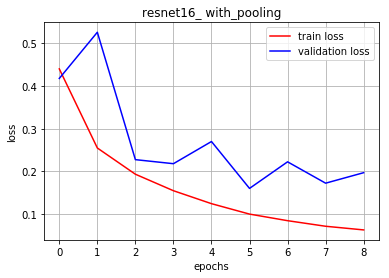

In [25]:
#my_model.model.history is a callback obj my_model.model.history is a dict
train_loss = my_model.model.history.history['loss'] 
val_loss = my_model.model.history.history['val_loss']
xc = range(9)

plt.figure()
plt.title('resnet16_ with_pooling')
plt.xlabel('epochs');
plt.ylabel('loss')
plt.plot(xc, train_loss,'r-',label="train loss")
plt.plot(xc, val_loss, 'b-',label="validation loss")
plt.grid('on')
plt.legend()

In [671]:
start = time.time()
predictions= my_model._predict(x[:1000],y[:1000])
duration = time.time()-start
print(duration)

''' 
12.427s for 100 predictions
1.28s for 10 predicitons
97.0560390949 for 1000 predictions 
'''

NameError: name 'x' is not defined

/project/6016730/mlhaa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


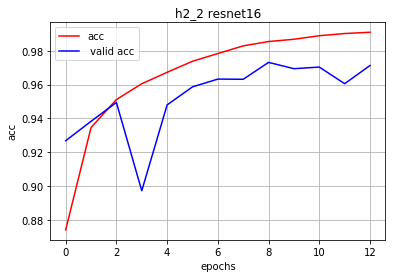

In [40]:
acc = my_model.model.history.history['acc'] 
val_acc = my_model.model.history.history['val_acc'] 
xc =range(13)
plt.figure()
plt.title('h2_2 resnet16')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(xc, acc,'r-',label="acc")
plt.plot(xc, val_acc,'b-',label=" valid acc")
plt.grid('on')
plt.legend()

In [674]:
x_test = np.load('pos_real_nonskysubtracted_x1.npy')
y_test = np.load('pos_real_nonskysubtracted_y1.npy')
x_test.shape

(420, 1, 100, 100)

(1200, 1, 100, 100)
[1.]


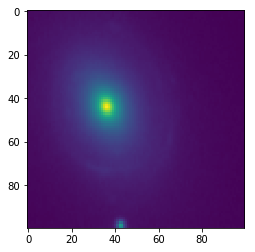

In [53]:
i = 1183

print( ims_real_test.shape)
plt.imshow(ims_real_test[i][0])
print(y_real_test[i])

In [13]:
#load the real TEST images and their negatives
import os
from astropy.io import fits
import numpy as np
from sklearn.preprocessing import minmax_scale
from random import shuffle

NEG_PATH = "/home/toyonaga/scratch/augmented_reals_3/dim_negs_norm_aug_noskysubtract/"
#POS_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/non-neg-set/merged/"
POS_PATH = "/home/toyonaga/scratch/augmented_reals_3/augmented_reals_separate_test/"
set_size =15*40*2  #includes both pos and neg samples

ims_real_test = np.ones((set_size, 1, 100, 100))
y_real_test = np.ones((set_size,1))

c_sig=10

#load the negatives into even numbered indices (including 0)
count =0
neg_list = os.listdir(NEG_PATH)
shuffle(neg_list)
for filename in neg_list:
    if filename.endswith(".fits") and count<set_size/2: 
        pic = fits.open(NEG_PATH+filename)[0].data
    
            
        c = np.nan_to_num(pic)
        sky_c =3.*np.median(pic)- 2.*np.mean(pic) #calc sky
        sigma_c= np.std(c)          #calc sigma
        c[np.isnan(c)]=sky_c          #get rid of NAn
        c[c>(sky_c+c_sig*sigma_c)]=sky_c+c_sig*sigma_c    #clip values
        c= c-sky_c                                         #subtract sky
        tmp_lens2 = c.reshape(-1,)                        #scale 

        tmp_lens2 = minmax_scale(tmp_lens2, feature_range = (0,1))
        pic = tmp_lens2.reshape(pic.shape[2],pic.shape[2])


        summed=pic
        np.random.seed()
        h1 = (sky_c)*np.random.randn(10000)
        np.random.shuffle(h1)
        summed = np.add(summed,h1.reshape(100,100)) # you can add constants too
        tmp_image = summed.reshape(-1,)
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        summed = tmp_image.reshape(summed.shape[0],summed.shape[1])
        ims_real_test[count*2] = summed
        y_real_test[count*2] = np.array([0])
        count+=1
    
    
#load the positives into odd numered indices
count =0
pos_list = os.listdir(POS_PATH)
shuffle(pos_list)
for filename in pos_list:
    if filename.endswith(".fits") and count<set_size/2: 
        pic = fits.open(POS_PATH+filename)[0].data
        
          
        c = np.nan_to_num(pic)
        sky_c =3.*np.median(pic)- 2.*np.mean(pic) #calc sky
        sigma_c= np.std(c)          #calc sigma
        c[np.isnan(c)]=sky_c          #get rid of NAn
        c[c>(sky_c+c_sig*sigma_c)]=sky_c+c_sig*sigma_c    #clip values
        c= c-sky_c                                         #subtract sky
        tmp_lens2 = c.reshape(-1,)                        #scale 

        tmp_lens2 = minmax_scale(tmp_lens2, feature_range = (0,1))
        pic = tmp_lens2.reshape(pic.shape[2],pic.shape[2])


        summed=pic
        np.random.seed()
        h1 = (sky_c)*np.random.randn(10000)
        np.random.shuffle(h1)
        summed = np.add(summed,h1.reshape(100,100)) # you can add constants too
        tmp_image = summed.reshape(-1,)
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        summed = tmp_image.reshape(summed.shape[0],summed.shape[1])
        ims_real_test[count*2+1] = summed
        y_real_test[count*2+1] = np.array([1])
        count+=1
        

          

In [26]:
predictions  = my_model._predict( x_combined_test, y= None, discrete = False)
tp =0.
fp =0.
fn=0.
pos =0.
for i in range(len(predictions)):
    if (predictions[i] ==1) and( y_combined_test[i] ==1):
        tp+=1
        pos+=1
        
    if (predictions[i] == 1) and (y_combined_test[i]==0): 
        fp+=1
        #print ("fp"+ str(i))
    if (predictions[i] == 0 ) and (y_combined_test[i] ==1):
        fn+=1
        pos+=1
        #print( "fn"+ str(i))
        
print ("fpr: ", fp/pos,"tpr: ", tp/pos ,"fp ",fp, "tp ",  tp,"fn ", fn)


...Generating Predictions ...
fpr:  0.0 tpr:  1.0 fp  0.0 tp  1156.0 fn  0.0


In [28]:
pur, comp = my_model.eval_purity_completeness(x_combined_test, y_combined_test)
#pur, comp = my_model.eval_purity_completeness(ims_real_test,y_real_test)
"purity" + str(pur),"comp" + str(comp)

...Generating Predictions ...


('purity0.8870159453302962', 'comp0.9735')

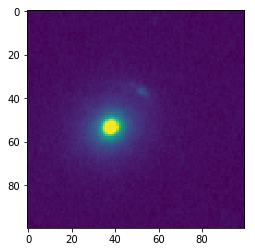

In [23]:
plt.imshow(ims_real_test[7][0])

(array([1145.,  144.,   98.,   60.,   45.,   48.,   45.,   33.,   30.,
          29.,   31.,   27.,   23.,   22.,   25.,   21.,   19.,   20.,
          20.,   16.,   13.,   18.,   17.,   16.,    6.,   19.,   28.,
          26.,   48., 1908.]),
 array([3.9458659e-09, 3.3333339e-02, 6.6666670e-02, 1.0000000e-01,
        1.3333334e-01, 1.6666667e-01, 2.0000000e-01, 2.3333333e-01,
        2.6666668e-01, 3.0000001e-01, 3.3333334e-01, 3.6666667e-01,
        4.0000001e-01, 4.3333334e-01, 4.6666667e-01, 5.0000000e-01,
        5.3333336e-01, 5.6666666e-01, 6.0000002e-01, 6.3333333e-01,
        6.6666669e-01, 6.9999999e-01, 7.3333335e-01, 7.6666665e-01,
        8.0000001e-01, 8.3333331e-01, 8.6666667e-01, 8.9999998e-01,
        9.3333334e-01, 9.6666664e-01, 1.0000000e+00], dtype=float32),
 <a list of 30 Patch objects>)

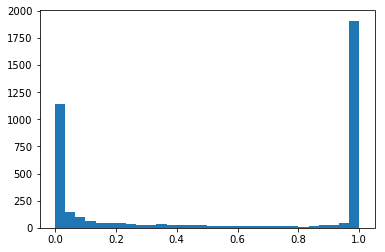

In [27]:
plt.hist(predictions,30)